<a href="https://colab.research.google.com/github/eunrod16/MachineDeepLearning/blob/master/ProyectoML2_FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


# Data AirBnb in NY
El ejercicio corresponde a obtener la clasificación de noches por año mayores a 100 en un lugar de AirAnb en New York. Los datos relevantes son precio, número de calificaciones, calificaciones por mes, tipo de habitación y listado de hosts.

In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("/content/drive/My Drive/AB_NYC_2019.csv", encoding='latin-1') 

data.head()

data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [3]:
import numpy as np

rs = np.random.RandomState(0)
df = data
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1,0.58829,-0.00312529,0.0909085,0.0106187,-0.0132245,-0.31976,0.291828,0.133272,0.0854676
host_id,0.58829,1,0.0202242,0.127055,0.0153091,-0.0173643,-0.140106,0.296417,0.15495,0.203492
latitude,-0.00312529,0.0202242,1,0.0847884,0.0339387,0.0248693,-0.0153888,-0.0101416,0.0195174,-0.0109835
longitude,0.0909085,0.127055,0.0847884,1,-0.150019,-0.0627471,0.0590943,0.145948,-0.114713,0.0827307
price,0.0106187,0.0153091,0.0339387,-0.150019,1,0.0427993,-0.0479542,-0.0306083,0.0574717,0.0818288
minimum_nights,-0.0132245,-0.0173643,0.0248693,-0.0627471,0.0427993,1,-0.0801161,-0.121702,0.12796,0.144303
number_of_reviews,-0.31976,-0.140106,-0.0153888,0.0590943,-0.0479542,-0.0801161,1,0.549868,-0.0723761,0.172028
reviews_per_month,0.291828,0.296417,-0.0101416,0.145948,-0.0306083,-0.121702,0.549868,1,-0.00942116,0.185791
calculated_host_listings_count,0.133272,0.15495,0.0195174,-0.114713,0.0574717,0.12796,-0.0723761,-0.00942116,1,0.225701
availability_365,0.0854676,0.203492,-0.0109835,0.0827307,0.0818288,0.144303,0.172028,0.185791,0.225701,1


In [0]:
drop_colums=['name','host_name','neighbourhood',"neighbourhood_group",'last_review',"host_id","id"]
data = data.drop(drop_colums,axis=1)

In [5]:
data.head()
df = data
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
df['room_type_encoded'] = encod.fit_transform(df.room_type)
df = df.fillna(0)
#private 1 entire 0
df = df.drop(["room_type"],axis=1)
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_encoded
0,40.64749,-73.97237,149,1,9,0.21,6,365,1
1,40.75362,-73.98377,225,1,45,0.38,2,355,0
2,40.80902,-73.94190,150,3,0,0.00,1,365,1
3,40.68514,-73.95976,89,1,270,4.64,1,194,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0


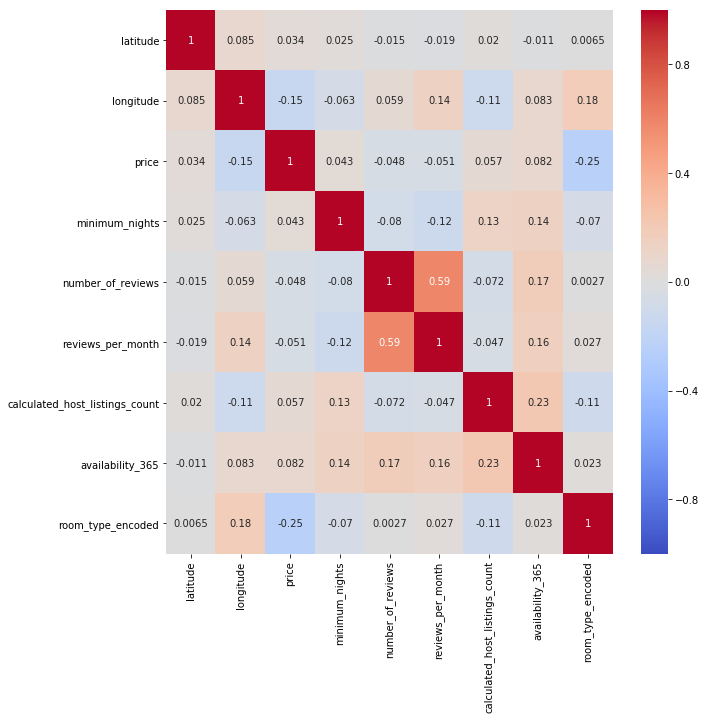

In [6]:

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [8]:
#x_train = df.drop('availability_365',axis=1)

x_train = df[df.columns[6:8]]
#y_train = df[df.columns[1:2]]
y_train =df[df.columns[7:8]]
y_train["availability_365"] =y_train["availability_365"].apply(lambda x: 1 if x > 100 else 0)
y_train.head()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.25, random_state = 1)
x_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,calculated_host_listings_count,availability_365
7842,4,102
44595,1,0
47241,1,12
41192,2,230
30522,2,163


# FNN


In [0]:


x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)



In [0]:
def accuracy(test_output, labels):
    num_correct = 0
    preds = torch.round(test_output.squeeze())
    correct_tensor = preds.eq(labels.float().view_as(preds))
    correct = np.squeeze(correct_tensor.numpy())
    num_correct += np.sum(correct)
    """"rounded_preds = torch.round(preds)
    correct = (rounded_preds == y).float() 
    acc = correct.sum() / len(correct)"""
    return num_correct/len(correct)

In [0]:
def checkpointModel():
    torch.save(model.state_dict(), "bestModel.model")
    print("Checkpoint saved")

In [0]:

class FeedPlease(nn.Module):
        def __init__(self, inputsize, hiddensize):
            super(FeedPlease, self).__init__()
            self.inputsize = inputsize
            self.hiddensize  = hiddensize
            self.h1 = nn.Linear(self.inputsize, self.hiddensize)
            self.relu = nn.ReLU()
            self.h2 = nn.Linear(self.hiddensize, 1)
            self.sigmoid = nn.Sigmoid()
            self.dropout = nn.Dropout(0.3)
        def forward(self, x):
            x = self.h1(x)
            x = self.relu(x)
            x = self.h2(x)
            x = self.dropout(x)
            x = self.sigmoid(x)
            return x


## Entrenamiento

In [13]:



model = FeedPlease(2,3)

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2, momentum = 0.9,nesterov = True, weight_decay= 1e-6)
errores = []
model.train()
epoch = 20
for epoch in range(epoch):
    optimizer.zero_grad()
    y_hat = model(x_train)
    loss = criterion(y_hat.squeeze(), y_train)
    acc = accuracy(y_hat.squeeze(), y_train)
    loss.backward()
    optimizer.step()
    errores.append(loss.item())
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()),' Accuracy: {}'.format(acc))
checkpointModel()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([36671, 1])) that is different to the input size (torch.Size([36671])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: train loss: 0.24679192900657654  Accuracy: 0.6097733904174961
Epoch 1: train loss: 0.24639855325222015  Accuracy: 0.6097733904174961
Epoch 2: train loss: 0.24582543969154358  Accuracy: 0.6097733904174961
Epoch 3: train loss: 0.24519795179367065  Accuracy: 0.6097733904174961
Epoch 4: train loss: 0.2443562000989914  Accuracy: 0.6097733904174961
Epoch 5: train loss: 0.24351438879966736  Accuracy: 0.6097733904174961
Epoch 6: train loss: 0.24287311732769012  Accuracy: 0.6097733904174961
Epoch 7: train loss: 0.24240905046463013  Accuracy: 0.6097733904174961
Epoch 8: train loss: 0.2420624941587448  Accuracy: 0.6097733904174961
Epoch 9: train loss: 0.24180641770362854  Accuracy: 0.6097733904174961
Epoch 10: train loss: 0.24175222218036652  Accuracy: 0.6097733904174961
Epoch 11: train loss: 0.24182379245758057  Accuracy: 0.6097733904174961
Epoch 12: train loss: 0.24186907708644867  Accuracy: 0.6097733904174961
Epoch 13: train loss: 0.24188797175884247  Accuracy: 0.6097733904174961
Epoc

## Evaluación


In [0]:
from sklearn.metrics import f1_score

In [15]:
checkpoint = torch.load("bestModel.model")
model = FeedPlease(2,3)
model.load_state_dict(checkpoint)
model.eval()
#model.eval()
optimizer.zero_grad()
y_hat = model(x_test)
loss = criterion(y_hat.squeeze(), y_test)
acc = accuracy(y_hat.squeeze(), y_test)
print('Train loss: {}'.format(loss.item()),' Accuracy: {}'.format(acc),
      ' F1 Score: {}'.format(f1_score(y_hat.squeeze().detach().numpy()> 0.5, y_test.detach().numpy(), average='macro')  ))
loss.backward()
optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([12224, 1])) that is different to the input size (torch.Size([12224])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Train loss: 0.24067381024360657  Accuracy: 0.6061027486910995  F1 Score: 0.3773748280955534


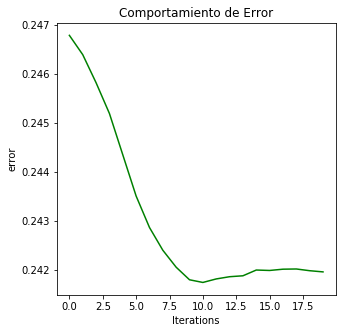

In [18]:
fig,ax = plt.subplots(figsize=(5,5))
ax.set_ylabel('error')
ax.set_xlabel('Iterations')
ax.set_title('Comportamiento de Error')
_=ax.plot(range(len(errores)),errores,'g')

## Conclusiones


*   Es importante que los datos tenga un buen porcentaje de correlación entre ellos sino el aprendizaje será demasiado lento
*   La cantidad de datos debe ser mayor a 10000 para que de igual manera no exista overfitting en el aprendizaje 
* Es importante regularizar la data con dropout.
* Relu es una buena función de activación de capa intermedia y Sigmoid una buena función de activación de capa final. Todo esto para resolver un problema de clasificación

